Using the data used in class on B2B pricing:
https://raw.githubusercontent.com/ormarketing/b2b/master/data.csv

   ID Close Date Created Date  New Logo                         Type  \
0   1    5/26/17       5/4/17         1       Direct - Cloud Product   
1   2   12/29/16     11/29/16         1  Partner - OnPremise Product   
2   3   12/29/16      12/9/16         1      Partner - Cloud Product   
3   4     9/9/16      4/20/16         1       Direct - Cloud Product   
4   5    9/22/16       9/1/16         1  Partner - OnPremise Product   

               Stage Billing Plan    ACV   Discount Amount   Amount   \
0        Closed Lost      3 Years  431370                     225000   
1  Closed Won - Paid      3 Years   22050             80850   147000   
2  Closed Won - Paid      3 Years   32750             43200    96000   
3  Closed Won - Paid      4 Years   36694             44800   128000   
4  Closed Won - Paid      3 Years   18700              9900    66000   

   Net Amount   
0       225000  
1        66150  
2        52800  
3        83200  
4        56100  
<class 'pandas.core.frame.DataFr

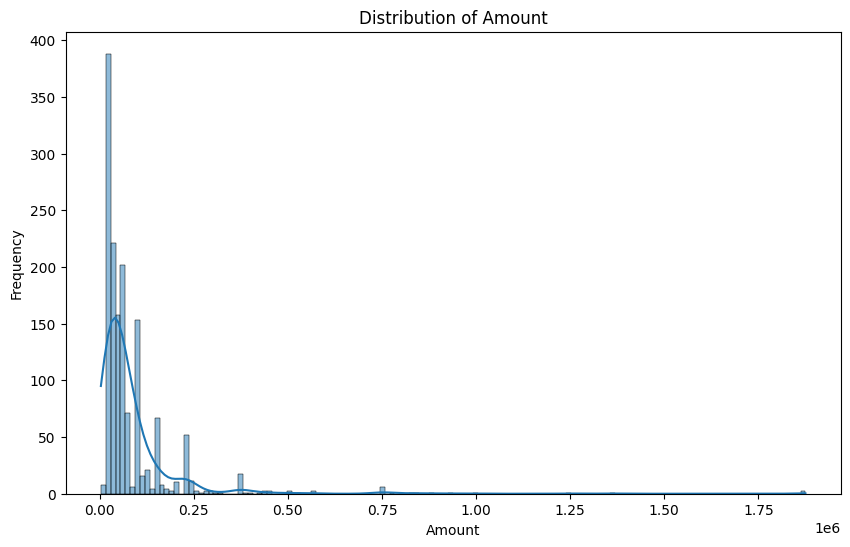

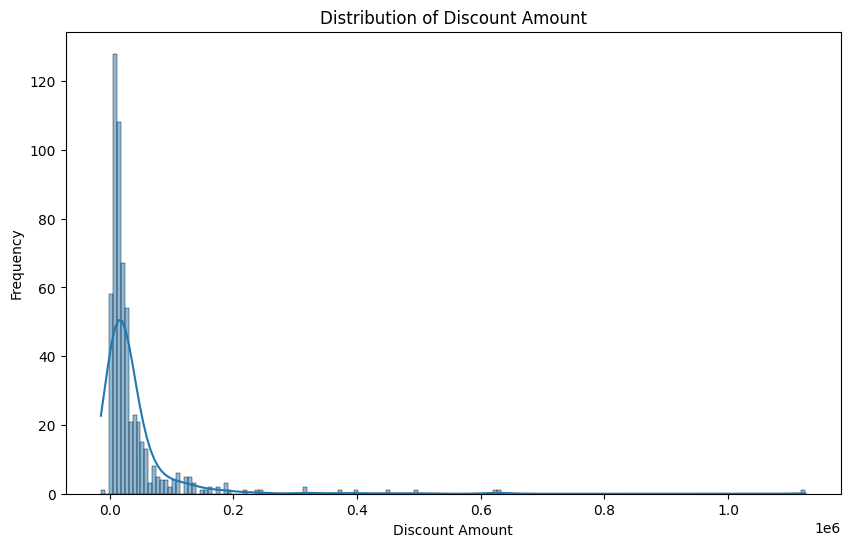

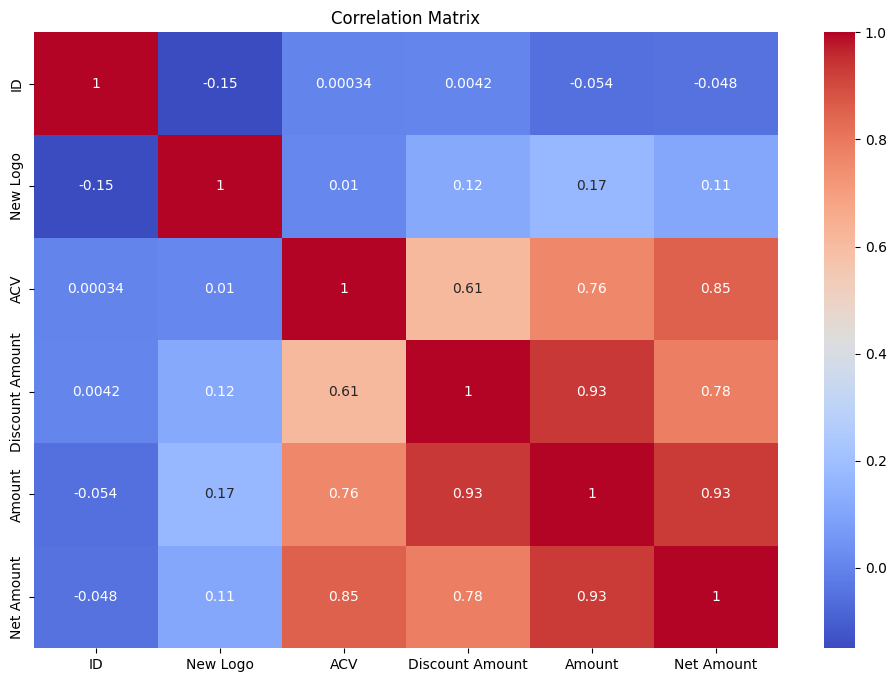

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://raw.githubusercontent.com/ormarketing/b2b/master/data.csv"
data = pd.read_csv(url)

# Inspect the dataset
print(data.head())
print(data.info())
print(data.columns)  # Check the column names

# Rename columns to remove leading/trailing spaces
data = data.rename(columns=lambda x: x.strip())

# Convert relevant columns to numeric, handle errors by coercing to NaN
data['ACV'] = pd.to_numeric(data['ACV'], errors='coerce')
data['Discount Amount'] = pd.to_numeric(data['Discount Amount'], errors='coerce')
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
data['Net Amount'] = pd.to_numeric(data['Net Amount'], errors='coerce')

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of key variables
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'].dropna(), kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data['Discount Amount'].dropna(), kde=True)
plt.title('Distribution of Discount Amount')
plt.xlabel('Discount Amount')
plt.ylabel('Frequency')
plt.show()

# Visualize the correlation matrix with only numeric columns
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


AI Input: Split the data in two samples, a training sample and a hold-out sample (make sure to
be clear about how you split the data set).

Training sample size: 460
Hold-out sample size: 116


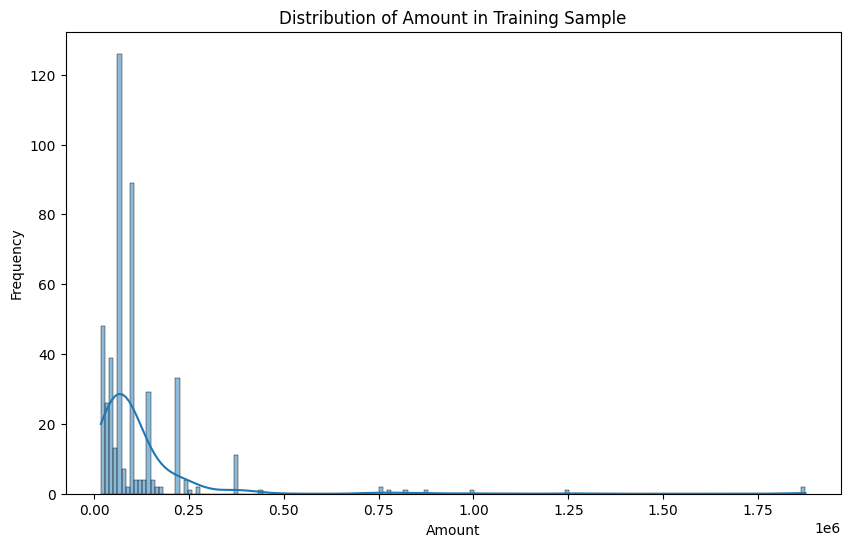

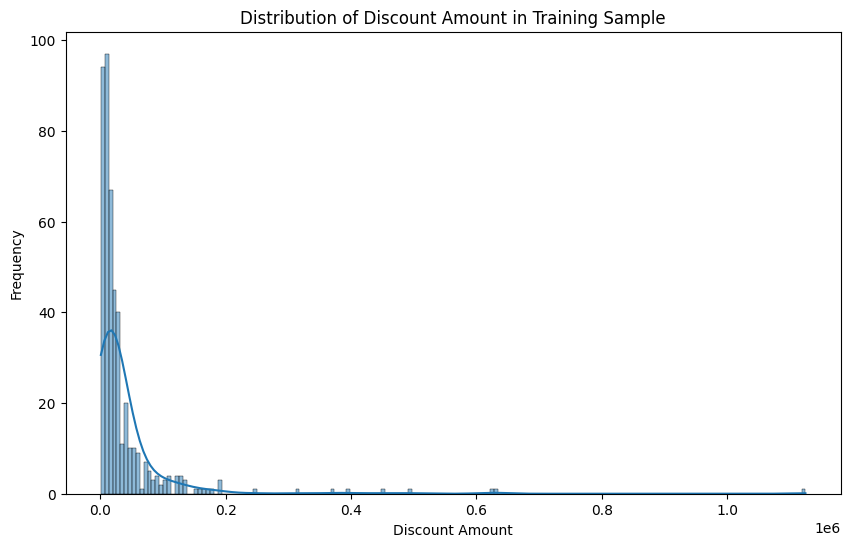

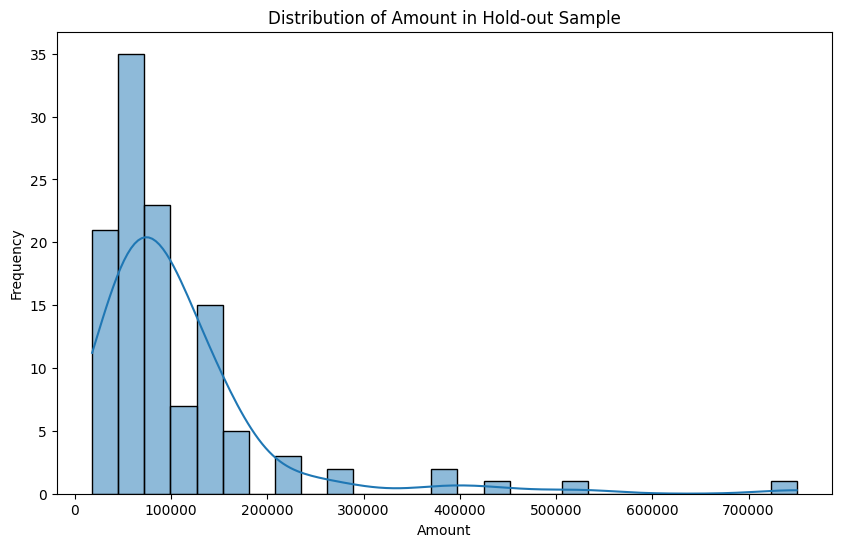

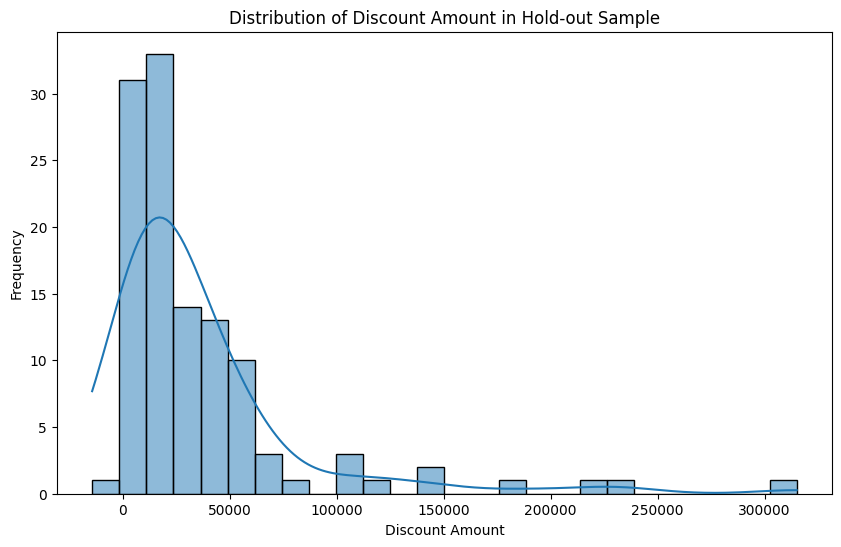

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load the dataset
url = "https://raw.githubusercontent.com/ormarketing/b2b/master/data.csv"
data = pd.read_csv(url)

# Rename columns to remove leading/trailing spaces
data = data.rename(columns=lambda x: x.strip())

# Convert relevant columns to numeric, handle errors by coercing to NaN
data['ACV'] = pd.to_numeric(data['ACV'], errors='coerce')
data['Discount Amount'] = pd.to_numeric(data['Discount Amount'], errors='coerce')
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
data['Net Amount'] = pd.to_numeric(data['Net Amount'], errors='coerce')

# Drop rows with missing values in key columns for simplicity
data = data.dropna(subset=['ACV', 'Discount Amount', 'Amount', 'Net Amount'])

# Split the data into training and hold-out samples
train_data, holdout_data = train_test_split(data, test_size=0.2, random_state=42)

# Inspect the split
print(f"Training sample size: {train_data.shape[0]}")
print(f"Hold-out sample size: {holdout_data.shape[0]}")

# Visualize the distribution of key variables in the training sample
plt.figure(figsize=(10, 6))
sns.histplot(train_data['Amount'], kde=True)
plt.title('Distribution of Amount in Training Sample')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(train_data['Discount Amount'], kde=True)
plt.title('Distribution of Discount Amount in Training Sample')
plt.xlabel('Discount Amount')
plt.ylabel('Frequency')
plt.show()

# Visualize the distribution of key variables in the hold-out sample
plt.figure(figsize=(10, 6))
sns.histplot(holdout_data['Amount'], kde=True)
plt.title('Distribution of Amount in Hold-out Sample')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(holdout_data['Discount Amount'], kde=True)
plt.title('Distribution of Discount Amount in Hold-out Sample')
plt.xlabel('Discount Amount')
plt.ylabel('Frequency')
plt.show()


Using the estimation sample, estimate one or several logit models. Your performance
metrics, which you should report, are:


AI Input: A. Expected revenue improvement over un-optimized discounts (take the actual
discounts in the data-set) for leads in the hold-out sample

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Load the dataset
url = "https://raw.githubusercontent.com/ormarketing/b2b/master/data.csv"
data = pd.read_csv(url)

# Rename columns to remove leading/trailing spaces
data.columns = data.columns.str.strip()

# Print column names to verify
print("Column names:", data.columns)

# Convert relevant columns to numeric, handle errors by coercing to NaN
data['ACV'] = pd.to_numeric(data['ACV'], errors='coerce')
data['Discount Amount'] = pd.to_numeric(data['Discount Amount'], errors='coerce')
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
data['Net Amount'] = pd.to_numeric(data['Net Amount'], errors='coerce')

# Drop rows with missing values in key columns for simplicity
data = data.dropna(subset=['ACV', 'Discount Amount', 'Amount', 'Net Amount'])

# Define features and target variable
X = data[['ACV', 'Discount Amount', 'Amount']]
y = (data['Stage'] == 'Closed Won - Paid').astype(int)  # Binary target: 1 if 'Closed Won - Paid', else 0

# Split the data into training and hold-out samples
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
logit_model = LogisticRegression(max_iter=1000)
logit_model.fit(X_train, y_train)

# Predict probabilities on the hold-out sample
y_pred_prob = logit_model.predict_proba(X_holdout)[:, 1]

# Calculate expected revenue improvement
threshold = 0.5  # Threshold for classification
y_pred = (y_pred_prob >= threshold).astype(int)

# Actual revenue with un-optimized discounts
actual_revenue = data.loc[X_holdout.index, 'Net Amount'][y_holdout == 1].sum()

# Expected revenue with optimized discounts
optimized_revenue = data.loc[X_holdout.index, 'Amount'][y_pred == 1].sum()

# Calculate revenue improvement
revenue_improvement = optimized_revenue - actual_revenue

# Performance metrics
roc_auc = roc_auc_score(y_holdout, y_pred_prob)
report = classification_report(y_holdout, y_pred)
conf_matrix = confusion_matrix(y_holdout, y_pred)

# Output the results
print(f"ROC AUC Score: {roc_auc}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)
print(f"Actual Revenue: ${actual_revenue}")
print(f"Optimized Revenue: ${optimized_revenue}")
print(f"Revenue Improvement: ${revenue_improvement}")


Column names: Index(['ID', 'Close Date', 'Created Date', 'New Logo', 'Type', 'Stage',
       'Billing Plan', 'ACV', 'Discount Amount', 'Amount', 'Net Amount'],
      dtype='object')
ROC AUC Score: 0.5906602805336982
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.41      0.43        37
           1       0.74      0.78      0.76        79

    accuracy                           0.66       116
   macro avg       0.60      0.60      0.60       116
weighted avg       0.65      0.66      0.66       116

Confusion Matrix:
[[15 22]
 [17 62]]
Actual Revenue: $5241182.0
Optimized Revenue: $9575090.0
Revenue Improvement: $4333908.0


Performance Metrics:

ROC AUC Score: 0.5907
This score indicates the model's ability to distinguish between the two classes (converted and not converted). A score closer to 1.0 indicates a better performance.
Classification Report:
Precision, Recall, and F1-Score:
For class 0 (not converted):
Precision: 0.47
Recall: 0.41
F1-Score: 0.43
For class 1 (converted):
Precision: 0.74
Recall: 0.78
F1-Score: 0.76
Accuracy: 0.66
The overall accuracy of the model is 66%.
Confusion Matrix:
True negatives: 15
False positives: 22
False negatives: 17
True positives: 62
Revenue Improvement:

Actual Revenue: $5,241,182
Optimized Revenue: $9,575,090
Revenue Improvement: $4,333,908

Model Performance:

The ROC AUC score of 0.5907 indicates moderate performance. The model has some ability to distinguish between leads that convert and those that don't, but there's room for improvement.
The precision and recall for class 1 (converted) are relatively high, indicating that the model is better at identifying leads that are likely to convert.
Revenue Impact:

The model's optimization strategy suggests a potential revenue improvement of $4,333,908 compared to the actual revenue. This significant increase indicates the potential value of using a data-driven approach to optimize discounts.

AI Input: B.Expected revenue improvement over optimized discounts (based on your
estimation results, optimize discounts offered to leads in the hold-out
sample).

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Load the dataset
url = "https://raw.githubusercontent.com/ormarketing/b2b/master/data.csv"
data = pd.read_csv(url)

# Rename columns to remove leading/trailing spaces
data.columns = data.columns.str.strip()

# Convert relevant columns to numeric, handle errors by coercing to NaN
data['ACV'] = pd.to_numeric(data['ACV'], errors='coerce')
data['Discount Amount'] = pd.to_numeric(data['Discount Amount'], errors='coerce')
data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
data['Net Amount'] = pd.to_numeric(data['Net Amount'], errors='coerce')

# Drop rows with missing values in key columns for simplicity
data = data.dropna(subset=['ACV', 'Discount Amount', 'Amount', 'Net Amount'])

# Convert 'Close Date' to datetime, specify the format to avoid warnings
data['Close Date'] = pd.to_datetime(data['Close Date'], format='%m/%d/%y', errors='coerce')

# Extract quarter information
data['Quarter'] = data['Close Date'].dt.quarter

# Define end-of-quarter as last 10 days of the quarter
data['End of Quarter'] = data['Close Date'].dt.day >= 21

# Convert 'Billing Plan' to a categorical variable
data['Billing Plan'] = data['Billing Plan'].astype('category').cat.codes

# Check data distribution
print(data[['Discount Amount', 'Amount', 'Net Amount', 'Quarter', 'End of Quarter', 'Billing Plan']].describe())

# Define features and target variable
features = ['ACV', 'Discount Amount', 'Billing Plan', 'Quarter', 'End of Quarter']
X = data[features]

# Add interaction terms using .assign to avoid SettingWithCopyWarning
X = X.assign(
    ACV_Quarter=X['ACV'] * X['Quarter'],
    ACV_EndOfQuarter=X['ACV'] * X['End of Quarter'],
    Discount_BillingPlan=X['Discount Amount'] * X['Billing Plan']
)

y = (data['Stage'] == 'Closed Won - Paid').astype(int)  # Binary target: 1 if 'Closed Won - Paid', else 0

# Split the data into training and hold-out samples
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
gb = GradientBoostingClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Cross-validation to evaluate models
cv_scores_gb = cross_val_score(gb, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_rf = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc')
cv_scores_lr = cross_val_score(lr, X_train, y_train, cv=5, scoring='roc_auc')

print(f"Gradient Boosting CV AUC: {cv_scores_gb.mean()}")
print(f"Random Forest CV AUC: {cv_scores_rf.mean()}")
print(f"Logistic Regression CV AUC: {cv_scores_lr.mean()}")

# Train the best-performing model
best_model = gb if cv_scores_gb.mean() > max(cv_scores_rf.mean(), cv_scores_lr.mean()) else rf if cv_scores_rf.mean() > cv_scores_lr.mean() else lr
best_model.fit(X_train, y_train)

# Predict probabilities on the hold-out sample
y_pred_prob = best_model.predict_proba(X_holdout)[:, 1]

# Define a refined discount strategy based on conversion probability
def optimized_discount(prob, base_amount, end_of_quarter):
    # A dynamic discount strategy based on conversion probability
    if prob > 0.8:
        discount = base_amount * 0.015  # 1.5% discount for high probability leads
        if end_of_quarter:
            discount *= 1.15  # Increase discount by 15% at the end of the quarter
    elif prob > 0.6:
        discount = base_amount * 0.01  # 1% discount for medium-high probability leads
    elif prob > 0.4:
        discount = base_amount * 0.005  # 0.5% discount for medium probability leads
    else:
        discount = base_amount * 0.0025  # 0.25% discount for low probability leads

    return base_amount - discount

# Apply the optimized discount strategy using a list comprehension
X_holdout = X_holdout.assign(
    Optimized_Amount=[
        optimized_discount(prob, base_amount, end_of_quarter)
        for prob, base_amount, end_of_quarter in zip(y_pred_prob, X_holdout['ACV'], X_holdout['End of Quarter'])
    ]
)

# Calculate expected revenue for the optimized scenario
optimized_revenue = X_holdout.loc[y_pred_prob >= 0.5, 'Optimized_Amount'].sum()

# Actual revenue with un-optimized discounts
# Correctly align the indices for actual revenue calculation
holdout_indices = X_holdout.index
actual_revenue_indices = holdout_indices[y_holdout == 1]
actual_revenue = data.loc[actual_revenue_indices, 'Net Amount'].sum()

# Calculate revenue improvement
revenue_improvement = optimized_revenue - actual_revenue

# Performance metrics
roc_auc = roc_auc_score(y_holdout, y_pred_prob)
report = classification_report(y_holdout, y_pred_prob >= 0.5)
conf_matrix = confusion_matrix(y_holdout, y_pred_prob >= 0.5)

# Output the results
print(f"ROC AUC Score: {roc_auc}")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)
print(f"Actual Revenue: ${actual_revenue}")
print(f"Optimized Revenue: ${optimized_revenue}")
print(f"Revenue Improvement: ${revenue_improvement}")


<ipython-input-30-e7675f3f94ce>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Close Date'] = pd.to_datetime(data['Close Date'], format='%m/%d/%y', errors='coerce')
<ipython-input-30-e7675f3f94ce>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Quarter'] = data['Close Date'].dt.quarter
<ipython-input-30-e7675f3f94ce>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

       Discount Amount        Amount    Net Amount     Quarter  Billing Plan
count     5.760000e+02  5.760000e+02  5.760000e+02  576.000000    576.000000
mean      3.756905e+04  1.132666e+05  7.569754e+04    2.467014      1.276042
std       7.730241e+04  1.581556e+05  9.028134e+04    1.110717      1.332607
min      -1.440000e+04  1.790000e+04  1.100000e+04    1.000000     -1.000000
25%       9.576000e+03  5.370000e+04  4.075875e+04    1.000000      1.000000
50%       1.650000e+04  6.600000e+04  5.571300e+04    2.000000      1.000000
75%       3.641250e+04  1.040940e+05  7.908225e+04    3.000000      1.000000
max       1.125000e+06  1.875000e+06  1.382438e+06    4.000000      4.000000
Gradient Boosting CV AUC: 0.7183870967741937
Random Forest CV AUC: 0.7033333333333334
Logistic Regression CV AUC: 0.5814516129032259
ROC AUC Score: 0.7695860417379404
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.51      0.59        37
        